In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chapter 7- Ex1: Hacide
* Cho 2 tập tin là hacide_train.csv và hacide_test.csv. Dữ liệu này được dùng để xây dựng model dự đoán và kiểm tra một mẫu là hiếm hay phổ biến.
* Đọc dữ liệu hacide_train.csv, xem xét tính cân bằng giữa 2 loại mẫu hiếm và phổ bến. Trực quan hóa. Nhận xét
* Nếu 2 loại mẫu này không cân bằng, hãy chọn một phương pháp cân bằng dữ liệu và thực hiện. Giải thích lý do trực quan hóa xem kết quả

### Câu 1.
Đọc dữ liệu hacide_train.csv, xem xét tính cân bằng giữa 2 loại dữ liệu và trực quan hóa. Nhận xét.

In [2]:
data_train_1 = pd.read_csv("data/hacide_train.csv")

In [3]:
data_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   cls         1000 non-null   int64  
 2   x1          1000 non-null   float64
 3   x2          1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [4]:
data_train_1.head()

,Unnamed: 0,cls,x1,x2
0,1,0,0.200798,0.678038
1,2,0,0.016620,1.576558
2,3,0,0.228725,-0.559534
3,4,0,0.126379,-0.093814
4,5,0,0.600821,-0.298395


Count data theo category: hiếm và phổ biến

In [5]:
occ = data_train_1["cls"].value_counts()

In [6]:
occ

0    980
1     20
Name: cls, dtype: int64

<BarContainer object of 2 artists>

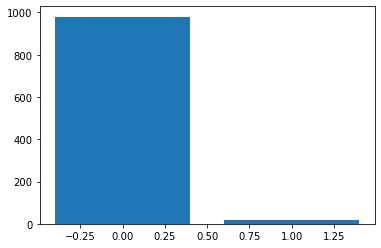

In [7]:
plt.bar(occ.index.values, occ.values)

In [8]:
# Print the ratio of fraud cases
print(occ / len(data_train_1.index))

0    0.98
1    0.02
Name: cls, dtype: float64


Vì lượng dữ liệu class 1 rất ít => Do đó ta sẽ áp dụng oversampling để nâng số mẫu của nhóm hiếm bằng với nhóm phổ biến

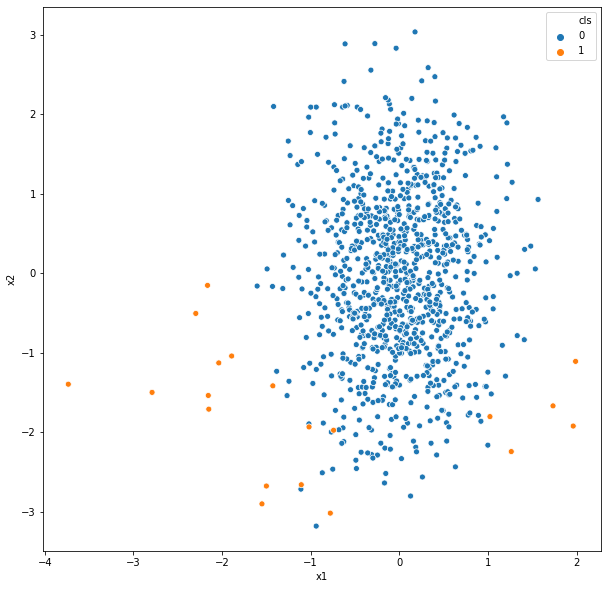

In [9]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_1, x="x1", y="x2", hue="cls")
plt.show()

### Split data to 2 dataset



In [10]:
X = data_train_1[["x1", "x2"]]
X.head()

,x1,x2
0,0.200798,0.678038
1,0.016620,1.576558
2,0.228725,-0.559534
3,0.126379,-0.093814
4,0.600821,-0.298395


In [11]:
y = data_train_1["cls"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cls, dtype: int64

In [12]:
# Oversampling way with SMOTE
from imblearn.over_sampling import SMOTE

In [13]:
smote = SMOTE()

In [14]:
X_S, y_S = smote.fit_resample(X, y)

In [15]:
from collections import Counter
sorted(Counter(y_S).items())

[(0, 980), (1, 980)]

In [16]:
Counter(y_S)

Counter({0: 980, 1: 980})

In [17]:
data_S = pd.DataFrame(X_S)
data_S.columns = ["x1", "x2"]
data_S["cls"] = y_S
data_S.head()

,x1,x2,cls
0,0.200798,0.678038,0
1,0.016620,1.576558,0
2,0.228725,-0.559534,0
3,0.126379,-0.093814,0
4,0.600821,-0.298395,0


In [18]:
data_S.shape

(1960, 3)

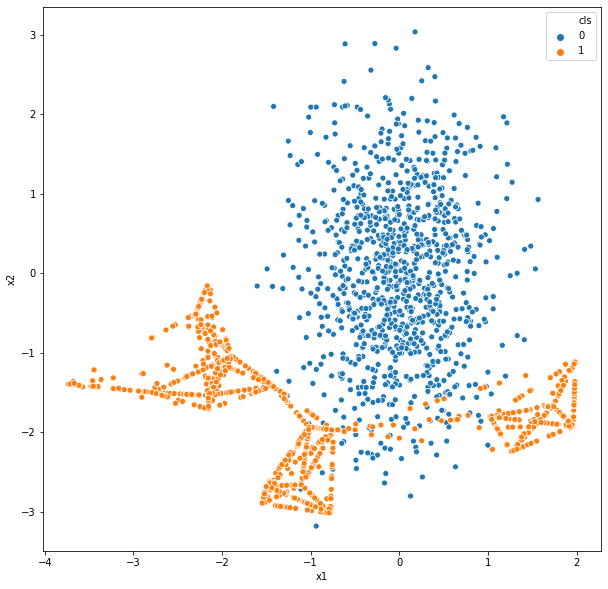

In [19]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_S, x="x1", y="x2", hue="cls")
plt.show()

In [20]:
# Use skelearn.utils import resample
X, y

(           x1        x2
 0    0.200798  0.678038
 1    0.016620  1.576558
 2    0.228725 -0.559534
 3    0.126379 -0.093814
 4    0.600821 -0.298395
 ..        ...       ...
 995 -2.296385 -0.505279
 996  1.022486 -1.802279
 997 -1.549866 -2.899393
 998  1.961917 -1.920985
 999  1.733797 -1.667270
 
 [1000 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 995    1
 996    1
 997    1
 998    1
 999    1
 Name: cls, Length: 1000, dtype: int64)

In [21]:
from sklearn.utils import resample

In [22]:
data_0 = data_train_1[data_train_1["cls"]==0]
data_1 = data_train_1[data_train_1["cls"]==1]

In [23]:
data_0.shape, data_1.shape

((980, 4), (20, 4))

In [24]:
data_1_resample = resample(data_1, replace=True, n_samples=data_0.shape[0], random_state=0)

In [25]:
data_1_resample

,Unnamed: 0,cls,x1,x2
992,993,1,-1.499922,-2.675112
995,996,1,-2.296385,-0.505279
980,981,1,-0.778730,-3.016021
983,984,1,-2.789707,-1.497824
983,984,1,-2.789707,-1.497824
...,...,...,...,...
994,995,1,-1.106395,-2.658774
987,988,1,-1.427158,-1.415405
992,993,1,-1.499922,-2.675112
991,992,1,-1.891949,-1.040471


In [26]:
oversample = pd.concat([data_0, data_1_resample])

In [27]:
oversample[oversample['cls'] == 1]

,Unnamed: 0,cls,x1,x2
992,993,1,-1.499922,-2.675112
995,996,1,-2.296385,-0.505279
980,981,1,-0.778730,-3.016021
983,984,1,-2.789707,-1.497824
983,984,1,-2.789707,-1.497824
...,...,...,...,...
994,995,1,-1.106395,-2.658774
987,988,1,-1.427158,-1.415405
992,993,1,-1.499922,-2.675112
991,992,1,-1.891949,-1.040471


In [28]:
oversample.cls.value_counts()

1    980
0    980
Name: cls, dtype: int64

<Figure size 432x288 with 0 Axes>

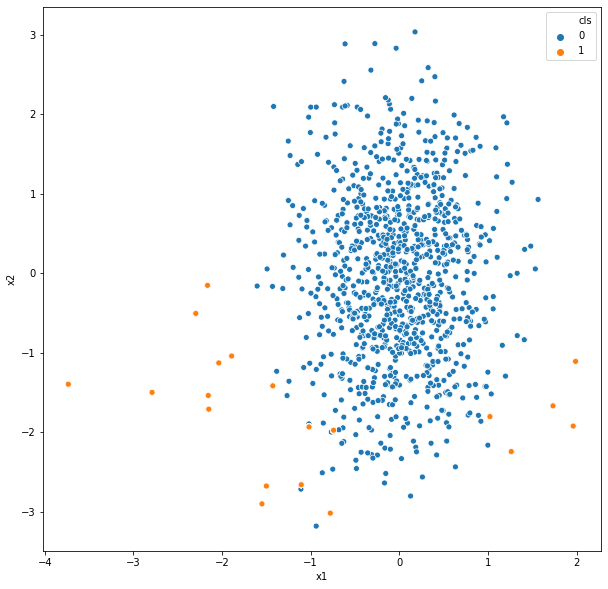

In [29]:
plt.clf()
plt.figure(figsize=(10, 10))
sns.scatterplot(data=oversample, x="x1", y="x2", hue="cls")
plt.show()

In [30]:
oversample.shape

(1960, 4)

## Chapter 7- Ex2: Adult Dataset
* Adult Dataset được cung cấp bởi UCI ( University of California, Irvine). được sử dụng để phát triển mô hình dự đoán Predictive Model Development.
* Bộ dữ liệu adult.data và adult.test chứa 48.842 mẫu và có 14 features. Dữ lệu được dùng để xây dựng model dự đoán và kiểm tra một mẫu có thu nhập > 50k hay không.

## Yêu cầu:
* Đọc dữ liệu adult.data, tiền xử lý dữ liệu.
* Xem xét tính cân bằng giữa hai loại mẫu. Nhận xét
* Nếu 2 loại mẫu này không cân bằng, hãy chọn một phương pháp cân bằng dữ liệu và thực hiện. Trực quan hóa dữ liệu

In [33]:
data_train_2 = pd.read_csv("data/adult/adult.data")

In [34]:
data_train_2

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Các công việc cần làm trước tiên:
* Xác định các thuộc tính/ biến (Variable Identification)
* Phân tích đơn biến (Univariate Analsis)
* Phân tích hai biến (Bi-Variate Analsis)
* Xử lý dữ liệu thiếu (Missing values)

## Xác định inputs/ output
* Inputs: Tất cả các thuộc tính trong dataset trừ <= 50k
* Output: <=50k